In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np
!pip install seaborn
import seaborn as sns

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [4]:
weather = pd.read_csv('WeatherDataPull/dataLargerSet.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [5]:
weatherClean=weather.drop("Unnamed: 0", axis=1)
weatherClean.head()

,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [6]:
# Data Pre-Processing

In [7]:
weatherClean.columns

Index(['index', 'winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [8]:
weatherCleandf = weatherClean.drop(['winery', 'vintage', 'cities'], axis=1)

In [9]:
# Given the set of values for features, we have to predict the quality of wine. 
# Find correlation of each feature with our target variable 'points'

correlations = weatherCleandf.corr()['points'].drop('points')
print(correlations)

index             -0.010689
MarchLowTemp       0.017426
MarchHighTemp     -0.017353
MarchAvgTemp      -0.005979
MarchPrecip       -0.046759
MarchCloudiness    0.036910
MarchHumidity     -0.014875
AprilLowTemp       0.057485
AprilHighTemp      0.013467
AprilAvgTemp       0.027138
AprilPrecip       -0.003042
AprilCloudiness   -0.022679
AprilHumidity      0.037504
MayLowTemp         0.046140
MayHighTemp       -0.009394
MayAvgTemp         0.001652
MayPrecip         -0.047806
MayCloudiness     -0.044780
MayHumidity        0.038937
JuneLowTemp        0.067235
JuneHighTemp      -0.017018
JuneAvgTemp        0.004488
JunePrecip         0.022076
JuneCloudiness    -0.031466
JuneHumidity       0.064528
JulyLowTemp        0.077308
JulyHighTemp      -0.121021
JulyAvgTemp       -0.101566
JulyPrecip         0.029619
JulyCloudiness     0.113703
JulyHumidity       0.204394
AugLowTemp         0.069809
AugHighTemp       -0.106148
AugAvgTemp        -0.085107
AugPrecip          0.017319
AugCloudiness      0

In [10]:
X = weatherCleandf.drop(['points'], axis=1)
y = weatherCleandf['points']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [12]:
print(y_test)

1201    91
115     88
979     87
175     90
63      92
        ..
1264    88
638     87
626     98
1008    87
178     88
Name: points, Length: 332, dtype: int64


In [13]:
# Fit linear regression to training data
model = LinearRegression()
model.fit(X_train,y_train)
  
# This gives the coefficients of the features selected above.  
print(model.coef_)

[-3.87419985e-05  6.16873432e-03 -3.09862667e-01  2.84915168e-01
 -7.68860151e-02  7.36284120e-02 -2.28711399e-02 -1.43797566e-01
  2.63964929e-01 -2.41879995e-01  3.36366503e-01 -1.47596059e-01
 -1.14245649e-02  5.78698705e-02  5.51563442e-01 -5.84608190e-01
  1.96270548e-02 -4.36034539e-02  4.13204156e-02  6.11529150e-02
 -1.90094056e-01  2.29922076e-01  5.03820342e-02  1.62690907e-02
 -9.86081217e-02  1.38370733e-01 -8.30843814e-01  7.09896564e-01
 -1.48816035e-01  4.15324629e-02  2.91352552e-02 -4.93214794e-02
  5.48889251e-01 -4.91437889e-01 -2.93545882e-01  5.49451082e-02
  7.08985133e-02]


In [14]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.14199583316490771
Testing Score: 0.06385278106900072


Text(0.5, 1.0, 'Residual Plot')

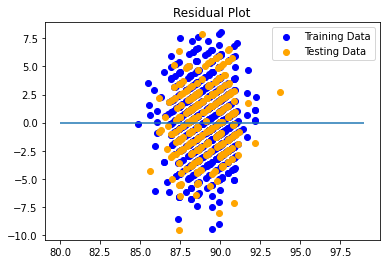

In [15]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [16]:
train_pred = model.predict(X_train)
print(train_pred)
test_pred = model.predict(X_test) 
print(test_pred)

[89.61305236 88.62072064 85.88985496 88.25640542 89.49759222 90.86510498
 89.78185996 89.70870829 87.70201048 90.93773927 89.70278076 87.75483253
 88.31050278 89.28030852 89.23029288 90.18678529 89.94300637 87.47525982
 89.96925515 90.1622175  88.11339056 88.56678631 88.0024914  89.29402347
 90.91794211 88.58127184 88.59196861 88.59392153 90.76637599 88.52614595
 89.29556763 90.04771724 88.63132033 91.67727639 88.52610721 89.07601149
 87.46313357 90.04944674 88.63128159 89.35486206 88.69425201 89.20874877
 90.19592024 89.97863511 90.89636282 88.79931866 90.18041768 89.89511198
 90.73814705 88.14020003 87.46631041 90.89644725 89.17992883 88.25455914
 88.26280591 89.2724387  89.96389053 90.06966172 91.67731513 87.18740316
 90.73772089 90.52354315 87.47518233 89.44498626 87.03024885 88.6513112
 87.96425989 89.97516223 86.96368549 90.09344272 90.86502054 89.736038
 87.47874665 88.14696512 89.97276218 87.47343894 89.50492013 89.48431802
 89.50929797 86.94237739 89.94426382 91.72866349 86.99